### Ejercicio 1: Define y extrae características Haar

Fíjate en la definción de las características Haar 1 y 3. Define el resto según la imagen siguiente. Usamos la librería `haar` incluida en el repositorio del curso.

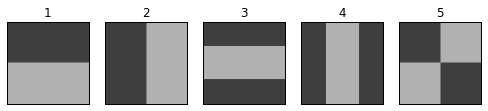

In [1]:
from IPython.display import Image
Image(filename='imgs/haar.png', width=500, height=100)

**Ejemplo de Ejecución**

$M=$

    [[ 1  1  1  1  1  1  1  1  1  1]
     [ 2  2  2  2  2  2  2  2  2  2]
     [ 3  3  3  3  3  3  3  3  3  3]
     [ 4  4  4  4  4  4  4  4  4  4]
     [ 5  7  5  5  5  5  5  5  5  5]
     [ 6  6  6  6  6  6  6  6  6  6]
     [ 7  7  7  7  7  7  7  7  7  7]
     [ 8  8  8  8  8  8  8  8  8  8]
     [ 9  9  9  9  9  9  9  9  9  9]
     [10 10 10 10 10 10 10 10 10 10]]
     
    > extract_haar(haar_1, M)
    -248
    > extract_haar(haar_2, M)
    2
    > extract_haar(haar_3, M)
    108
    > extract_haar(haar_4, M)
    112
    > extract_haar(haar_4, M)
    2

In [2]:
import sys
import numpy as np
sys.path.append("code")
%matplotlib inline
from haar import *

haar_1 = [ {"op": "add", "topleft_row_rel": 0.0, "topleft_col_rel": 0.0, "height_rel": 0.5, "width_rel": 1.0},
           {"op": "sub", "topleft_row_rel": 0.5, "topleft_col_rel": 0.0, "height_rel": 0.5, "width_rel": 1.0}]

# TU CODIGO AQUI
haar_2 = [ {"op": "add", "topleft_row_rel": 0.0, "topleft_col_rel": 0.0, "height_rel": 1.0, "width_rel": 0.5},
           {"op": "sub", "topleft_row_rel": 0.0, "topleft_col_rel": 0.5, "height_rel": 1.0, "width_rel": 0.5}]

haar_3 = [ {"op": "add", "topleft_row_rel": 0.0,   "topleft_col_rel": 0.0, "height_rel": 0.3, "width_rel": 1.0},
           {"op": "add", "topleft_row_rel": 0.7,   "topleft_col_rel": 0.0, "height_rel": 0.3, "width_rel": 1.0},
           {"op": "sub", "topleft_row_rel": 0.3,   "topleft_col_rel": 0.0, "height_rel": 0.4, "width_rel": 1.0}]

# TU CODIGO AQUI
haar_4 = [ {"op": "add", "topleft_row_rel": 0.0,   "topleft_col_rel": 0.0, "height_rel": 1.0, "width_rel": 0.3},
           {"op": "add", "topleft_row_rel": 0.0,   "topleft_col_rel": 0.7, "height_rel": 1.0, "width_rel": 0.3},
           {"op": "sub", "topleft_row_rel": 0.0,   "topleft_col_rel": 0.3, "height_rel": 1.0, "width_rel": 0.4}]

# TU CODIGO AQUI
haar_5 = [ {"op": "add", "topleft_row_rel": 0.0, "topleft_col_rel": 0.0, "height_rel": 0.5, "width_rel": 0.5},
           {"op": "sub", "topleft_row_rel": 0.0, "topleft_col_rel": 0.5, "height_rel": 0.5, "width_rel": 0.5},
           {"op": "sub", "topleft_row_rel": 0.5, "topleft_col_rel": 0.0, "height_rel": 0.5, "width_rel": 0.5},
           {"op": "add", "topleft_row_rel": 0.5, "topleft_col_rel": 0.5, "height_rel": 0.5, "width_rel": 0.5}]

haar_features = [haar_1,haar_2, haar_3,haar_4,haar_5]


Comprueba tu código

[[ 1  1  1  1  1  1  1  1  1  1]
 [ 2  2  2  2  2  2  2  2  2  2]
 [ 3  3  3  3  3  3  3  3  3  3]
 [ 4  4  4  4  4  4  4  4  4  4]
 [ 5  7  5  5  5  5  5  5  5  5]
 [ 6  6  6  6  6  6  6  6  6  6]
 [ 7  7  7  7  7  7  7  7  7  7]
 [ 8  8  8  8  8  8  8  8  8  8]
 [ 9  9  9  9  9  9  9  9  9  9]
 [10 10 10 10 10 10 10 10 10 10]]
-248
2
108
112
2


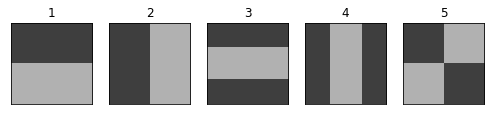

In [3]:
show_haar_features(haar_features)

M = create_sample_matrix(10)
print (M)
print (extract_haar(haar_1, M))
print (extract_haar(haar_2, M))
print (extract_haar(haar_3, M))
print (extract_haar(haar_4, M))
print (extract_haar(haar_5, M))

<font style="color: red">comprueba tu progreso hasta ahora</font>

%run -i code/p_02B_eval

### Ejercicio 2:  Usa la imagen integral para calcular la suma de una submatriz

Cuando queremos obtener muchas características Haar de una misma imagen, calcular la suma de los elementos de distintas submatrices puede ser computacionalmente muy pesado. Para reducir el tiempo de cómputo en estos casos, calculamos previamente la _matriz integral_ de una imagen, y luego realizamos los cálculos de las sumas de las submatrices sobre ella, en vez de usar la imagen original.

Dada una matriz $M \in \mathbb{R}^{m\times n}$, denotamos su matriz integral por $M_I \in \mathbb{R}^{m\times n}$. El elemento de la columna $c$ y fila $r$ de $M_I$, con $0\leq r <m$ y $0\leq c < n$ viene dado por:

$$m_I[r,c] = \sum_{i=0}^r \sum_{j=0}^cm[i,j]$$

donde $m[i,j]$ es el elemento de la fila $i$ y de la columna $j$ de la matriz $M$. Es decir $m_I[r,c]$ es la suma de los elementos de la sub-matriz de $M$ que está entre las posiciones $(0,0)$ y $(r,c)$.

para cualquier matriz puedes usar la función `get_integral(M)` de la librería `haar` del curso para obtener su matriz integral correspondiente

In [4]:
import numpy as np
M = np.array([[1,2,3],[3,4,5],[7,8,9]])
print (M)
print (get_integral(M))

[[1 2 3]
 [3 4 5]
 [7 8 9]]
[[ 1  3  6]
 [ 4 10 18]
 [11 25 42]]


La matriz integral nos sirve para calcular la suma de los elementos de una región cualquiera de la matriz original  tienen su origen en la esquina superior izquierda de dicha matriz original. Si quisiéramos considerar una región arbitraria (por ejemplo $S$ en la figura siguiente), podemos usar igualmente la matriz integral usando el hecho de que:

$$ sum(S) = sum(C)+sum(A)-sum(B)-sum(D)$$

en donde las matrices $A$, $B$, $C$ and $D$ tienen su origen en la esquina superior izquierda, como se ilustra en la figura. Por tanto:

$$ sum(S) = m_I(c) + m_I(a) - m_I(b) - m_I(d)$$

y, si previamente tenemos $M_I$ con tres operaciones tenemos la suma de los elementos de cualquier región. Si tenemos que calcular muchas regiones, entonces al calcular previamente $M_I$, usando la forma anterior tendremos un proceso mucho menos pesado computacionalmente.

Observa igualmente la relación entre las coordenadas de los distintos puntos, por ejemplo, el punto $a=(a_r, a_c)$ y $t=(t_r, r_c)$ en donde, $a_r = t_r - 1$ y $a_c=t_c-1$. En cambio, $d_r=c_r$ y $d_c=t_c-1$

<img src="imgs/integral.png"/>

Completa la función `get_submatrix_sum_using_integral` para que, dada una matriz integral, devuelva la suma de la submatriz indicada por `topleft_row`, `topleft_col`, `height`, `width`. Ignora el argumento `image` que lo incluimos por compatibilidad con el resto del código.

**Ejecución de ejemplo**

Matriz original `M`


    [[ 1  1  1  1  1  1  1  1  1  1]
     [ 2  2  2  2  2  2  2  2  2  2]
     [ 3  3  3  3  3  3  3  3  3  3]
     [ 4  4  4  4  4  4  4  4  4  4]
     [ 5  7  5  5  5  5  5  5  5  5]
     [ 6  6  6  6  6  6  6  6  6  6]
     [ 7  7  7  7  7  7  7  7  7  7]
     [ 8  8  8  8  8  8  8  8  8  8]
     [ 9  9  9  9  9  9  9  9  9  9]
     [10 10 10 10 10 10 10 10 10 10]]

Matriz integral `Mi` 


    [[  1   2   3   4   5   6   7   8   9  10]
     [  3   6   9  12  15  18  21  24  27  30]
     [  6  12  18  24  30  36  42  48  54  60]
     [ 10  20  30  40  50  60  70  80  90 100]
     [ 15  32  47  62  77  92 107 122 137 152]
     [ 21  44  65  86 107 128 149 170 191 212]
     [ 28  58  86 114 142 170 198 226 254 282]
     [ 36  74 110 146 182 218 254 290 326 362]
     [ 45  92 137 182 227 272 317 362 407 452]
     [ 55 112 167 222 277 332 387 442 497 552]]
     

    > get_submatrix_sum_using_integral(M, Mi, 1,2,4,6)
    > 84
    > np.sum(M[1:5,2:8])
    > 84
    > get_submatrix_sum_using_integral(M, Mi, 0,4,1,3)
    > 3
    > np.sum(M[0:1,4:7])
    > 3
    > get_submatrix_sum_using_integral(M, Mi, 1,6,4,3)
    > 42
    > np.sum(M[1:5,6:9])
    > 42
    > get_submatrix_sum_using_integral(M, Mi, 0,0,3,1)
    > 6
    > np.sum(M[0:3,0:1])
    > 6

    > extract_haar(haar_1, M, Mi)
    > -248
    > extract_haar(haar_1, M, Mi, submatrix_sum_function=get_submatrix_sum_using_integral)
    > -248

In [5]:
import sys
import numpy as np
sys.path.append("code")
%matplotlib inline
from haar import *

def get_submatrix_sum_using_integral(image, integral, topleft_row, topleft_col, height, width):
    
    # TU CODIGO AQUI
    Sx = topleft_col+width-1
    Sy = topleft_row+height-1
    S= integral[Sy,Sx] if Sy>=0 and Sx>=0 else 0 
    
    Ax = topleft_col-1
    Ay =topleft_row-1
    A = integral[Ay,Ax] if Ay>=0 and Ax>=0 else 0 
    
    Bx =topleft_col+width-1
    By =topleft_row-1
    B = integral[By,Bx]if By>=0 and Bx>=0 else 0 
    
    Cx=topleft_col-1
    Cy=topleft_row+height-1
    C = integral[Cy,Cx] if Cy>=0 and Cx>=0 else 0 
    result = S+A-B-C
    return result

Comprueba tu código

In [6]:
M = create_sample_matrix(10)
Mi = get_integral(M)
print (M)
print (Mi)

print (get_submatrix_sum_using_integral(None, Mi, 1,2,4,6))
print (np.sum(M[1:5,2:8]))
print (get_submatrix_sum_using_integral(None, Mi, 0,4,1,3))
print (np.sum(M[0:1,4:7]))
print (get_submatrix_sum_using_integral(None, Mi, 1,6,4,3))
print (np.sum(M[1:5,6:9]))
print (get_submatrix_sum_using_integral(None, Mi, 0,0,3,1))
print (np.sum(M[0:3,0:1]))

print (extract_haar(haar_1, M, None))
print (extract_haar(haar_1, None, Mi, submatrix_sum_function=get_submatrix_sum_using_integral))


[[ 1  1  1  1  1  1  1  1  1  1]
 [ 2  2  2  2  2  2  2  2  2  2]
 [ 3  3  3  3  3  3  3  3  3  3]
 [ 4  4  4  4  4  4  4  4  4  4]
 [ 5  7  5  5  5  5  5  5  5  5]
 [ 6  6  6  6  6  6  6  6  6  6]
 [ 7  7  7  7  7  7  7  7  7  7]
 [ 8  8  8  8  8  8  8  8  8  8]
 [ 9  9  9  9  9  9  9  9  9  9]
 [10 10 10 10 10 10 10 10 10 10]]
[[  1   2   3   4   5   6   7   8   9  10]
 [  3   6   9  12  15  18  21  24  27  30]
 [  6  12  18  24  30  36  42  48  54  60]
 [ 10  20  30  40  50  60  70  80  90 100]
 [ 15  32  47  62  77  92 107 122 137 152]
 [ 21  44  65  86 107 128 149 170 191 212]
 [ 28  58  86 114 142 170 198 226 254 282]
 [ 36  74 110 146 182 218 254 290 326 362]
 [ 45  92 137 182 227 272 317 362 407 452]
 [ 55 112 167 222 277 332 387 442 497 552]]
84
84
3
3
42
42
6
6
-248
-248


<font style="color: red">comprueba tu progreso hasta ahora</font>

%run -i code/p_02B_eval

Mide y compara la eficiencia de tu código

In [8]:
M = create_sample_matrix(300)
Mi = get_integral(M)
%timeit extract_haar(haar_1, M, Mi)
%timeit extract_haar(haar_1, M, Mi, submatrix_sum_function=get_submatrix_sum_using_integral)

72.1 µs ± 1.49 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
10.6 µs ± 222 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


### Ejercicio 3:  Construye dataset MNIST con características Haar

observa como se carga el dataset MNIST y se obtienen las características Haar de la primera imagen con diferentes niveles de escalado y desplazamiento, según el parámetro `N` con la función `get_haar_features`. Previamente calculamos la imagen integral con `get_integral`

In [9]:
import numpy as np
mnist = np.loadtxt("data/mnist1.5k.csv", delimiter=",")
pixeles=mnist[:,1:785]
numeros=mnist[:,0]
print ("dimension de las imagenes y las clases", numeros.shape, pixeles.shape)

dimension de las imagenes y las clases (1500,) (1500, 784)


In [10]:
import sys
import numpy as np
sys.path.append("code")
%matplotlib inline
from haar import *

haar_1 = [ {"op": "add", "topleft_row_rel": 0.0, "topleft_col_rel": 0.0, "height_rel": 0.5, "width_rel": 1.0},
           {"op": "sub", "topleft_row_rel": 0.5, "topleft_col_rel": 0.0, "height_rel": 0.5, "width_rel": 1.0}]

haar_2 = [ {"op": "add", "topleft_row_rel": 0.0, "topleft_col_rel": 0.0, "height_rel": 1.0, "width_rel": 0.5},
           {"op": "sub", "topleft_row_rel": 0.0, "topleft_col_rel": 0.5, "height_rel": 1.0, "width_rel": 0.5}]

haar_features = [ haar_1, haar_2 ]

N=6
haar_features = [ haar_1, haar_2]
M  = pixeles[0].reshape(28,28)
Mi = get_integral(M)
hf = get_haar_features(haar_features, M, Mi, nb_scales=N, nb_shifts=N)
print ("number of features", len(hf))
print (hf)

number of features 200
[0.0, 0.0, 0.0, -1324.0, 0.0, 0.0, -863.0, 583.0, 0.0, -411.0, -84.0, 240.0, 0.0, -893.0, 950.0, 0.0, 0.0, 0.0, -1137.0, 0.0, -863.0, -290.0, -20.0, -104.0, 156.0, -1289.0, -339.0, 950.0, 0.0, -1324.0, -863.0, -280.0, -104.0, 136.0, -339.0, -339.0, -1137.0, -290.0, 136.0, -339.0, 0.0, 0.0, -1632.0, -2228.0, 0.0, -411.0, -3476.0, 3312.0, 0.0, -4180.0, 3548.0, 240.0, 0.0, -1632.0, -4037.0, -20.0, -3496.0, -174.0, -3565.0, -17.0, 3788.0, -1632.0, -3860.0, -3496.0, -184.0, -17.0, 223.0, -4037.0, -194.0, 223.0, 0.0, -188.0, -5220.0, 895.0, 0.0, -4028.0, -621.0, 3633.0, 0.0, -5220.0, -4522.0, -2762.0, -3383.0, 3002.0, -5220.0, -4325.0, -3383.0, 250.0, -4522.0, 240.0, 0.0, -4028.0, -5645.0, 4477.0, -2762.0, -8407.0, -1365.0, -8407.0, -3930.0, -4127.0, 0.0, 0.0, 0.0, -942.0, 0.0, 0.0, -1586.0, 2096.0, 0.0, -20.0, -336.0, 240.0, 0.0, -2376.0, 1560.0, 0.0, 0.0, 0.0, -1324.0, 0.0, -1632.0, -1920.0, -411.0, -4697.0, 4868.0, -4591.0, 3031.0, 1560.0, 0.0, -1137.0, -888.0, -512

Completa la función `make_haar_dataset` para que dados los datos de MNIST (la variable `pixeles`) devuelva una matriz en la que cada fila contenga las características `haar` del dígito MNIST de fila correspondiente en la matriz original.

**Ejecución de ejemplo**

    > haar_features = [ haar_1, haar_2 ]
    > d_haar = make_haar_dataset_for_MNIST(haar_features, d, 6)
    > print "haar dataset size", d_haar.shape
    > print "checksum", np.sum(d_haar)

    number of haar features 200
     0% completed
     5% completed
    10% completed
    ...
    90% completed
    95% completed
    haar dataset size (1500, 200)
    checksum -473660366.0


In [11]:
haar_features = [ haar_1, haar_2 ]

def make_haar_dataset_for_MNIST(haar_features, pixeles, N):

    M  = pixeles[0].reshape(28,28)
    Mi = get_integral(M)
    num_feats = len(get_haar_features(haar_features, M, Mi, nb_scales=N, nb_shifts=N))
    print ("number of haar features", num_feats)
    pixeles_haar = np.zeros((pixeles.shape[0], num_feats))
    for i in range(pixeles.shape[0]):
        if i%(pixeles.shape[0]/20)==0:
            print ("{0:2.0f}% completed".format(i*1./pixeles.shape[0] * 100))
            
        M  = pixeles[i].reshape(28,28)
        Mi = get_integral(M)
        features = get_haar_features(haar_features, M, Mi, nb_scales=N, nb_shifts=N)
        pixeles_haar[i] = features
    return pixeles_haar

Comprueba tu código **LA VARIABLE `d_haar` HA DE CONTENER EL DATASET OBTENIDO CON N=6, NO LE CAMBIES EL NOMBRE**

In [12]:
haar_features = [ haar_1, haar_2 ]
pixeles_haar = make_haar_dataset_for_MNIST(haar_features, pixeles, 6)
print ("haar dataset size", pixeles_haar.shape)
print ("checksum", np.sum(pixeles_haar))

number of haar features 200
 0% completed
 5% completed
10% completed
15% completed
20% completed
25% completed
30% completed
35% completed
40% completed
45% completed
50% completed
55% completed
60% completed
65% completed
70% completed
75% completed
80% completed
85% completed
90% completed
95% completed
haar dataset size (1500, 200)
checksum -473660366.0


<font style="color: red">comprueba tu progreso hasta ahora</font>

%run -i code/p_02B_eval

Observa cómo se comporta el clasificador usando las características Haar

In [14]:
from sklearn.naive_bayes import GaussianNB
from sklearn import cross_validation
from sklearn.metrics import confusion_matrix

test_size = 0.2

pixeles_train, pixeles_test, numeros_train, numeros_test = cross_validation.train_test_split(pixeles_haar, 
                                                                     numeros, 
                                                                     test_size=test_size, 
                                                                     random_state=np.random.randint(1,100))

print ("dimensiones train", pixeles_train.shape, numeros_train.shape)
print ("dimsensions test ", pixeles_test.shape, numeros_test.shape)

clf_g = GaussianNB()
clf_g.fit(pixeles_train, numeros_train)
print ("acierto en train", clf_g.score(pixeles_train, numeros_train))
print ("acierto en test ", clf_g.score(pixeles_test, numeros_test))
print (confusion_matrix (numeros_test, clf_g.predict(pixeles_test)))

dimensiones train (1200, 200) (1200,)
dimsensions test  (300, 200) (300,)
acierto en train 0.841666666667
acierto en test  0.803333333333
[[19  0  0  0  1  2  0  0  0  0]
 [ 0 28  0  1  0  0  0  0  1  0]
 [ 0  0 27  3  0  3  1  0  0  0]
 [ 0  1  1 25  0  0  0  1  3  1]
 [ 0  0  0  1 21  0  3  0  0  3]
 [ 0  2  0  1  0 20  1  1  1  1]
 [ 0  1  2  0  0  0 28  0  0  0]
 [ 1  0  0  0  0  0  0 19  1  5]
 [ 0  3  0  2  0  4  0  0 25  2]
 [ 1  0  0  0  1  0  0  2  1 29]]


lo comparamos con validación cruzada con la clasificación basada únicamente en pixeles

In [15]:
from sklearn.cross_validation import cross_val_score, StratifiedKFold

clf_g = GaussianNB()
skf = cross_validation.StratifiedKFold(numeros, n_folds=5, shuffle=True, random_state=np.random.randint(1,100))
sc = cross_val_score(clf_g, pixeles, numeros, cv=skf)
print ("with pixels")
print ("  ", np.mean(sc), np.std(sc))
sc = cross_val_score(clf_g, pixeles_haar, numeros, cv=skf)
print ("with haar")
print ("  ", np.mean(sc), np.std(sc))

with pixels
   0.592048541262 0.0216192074063
with haar
   0.814548880613 0.0278963321275
